In [22]:
'''
metrics:
-Sensitivity
-Specificity
-ROC
-AUC
-Recall
'''

'\nmetrics:\n-Sensitivity\n-Specificity\n-ROC\n-AUC\n-Recall\n'

In [23]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


fn = "../data/northeast_realestate.parquet"

# reading data into pandas dataframe
df = pd.read_parquet(fn)
print(df.columns)
df

Index(['price', 'bed', 'bath', 'acre_lot', 'street', 'city', 'state',
       'zip_code', 'house_size', 'sold_date'],
      dtype='object')


,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,sold_date
0,225000.0,3.0,1.0,3.93,326 River Rd,Willington,Connecticut,6279.0,1572.0,None
1,579900.0,4.0,3.0,2.34,32 Heather Ln,Coventry,Connecticut,6238.0,3320.0,6/1/2021
2,65000.0,1.0,1.0,NaN,63 Schofield Rd Apt 34,Willington,Connecticut,6279.0,680.0,8/16/2019
3,215000.0,2.0,1.0,0.91,353 Rye St,East Windsor,Connecticut,6016.0,960.0,6/6/2012
4,144900.0,2.0,1.0,0.36,24 Worcester Rd,Vernon,Connecticut,6066.0,860.0,9/2/2016
...,...,...,...,...,...,...,...,...,...,...
517500,445000.0,1.0,2.0,0.99,1008 King St,Chappaqua,New York,10514.0,1052.0,5/9/2011
517501,418000.0,4.0,2.0,0.40,3 Elmwood Dr,Monroe,New York,10950.0,1650.0,7/21/2015
517502,469000.0,4.0,2.0,0.18,13 N Conger Ave,Congers,New York,10920.0,2123.0,None
517503,825000.0,5.0,5.0,0.79,7 Miller Rd,Valley Cottage,New York,10989.0,3775.0,6/2/2010


In [24]:
df['citystate'] = df['city'] + '_' + df['state']
top_towns = ['Staten Island_New York','Worcester_Massachusetts','Manhattan_New York','Portland_Maine']

df_top = df[df['citystate'].isin(top_towns)]
df_top = df_top[['price','bed','bath','house_size','citystate']].dropna()
df_top

,price,bed,bath,house_size,citystate
95335,319000.0,3.0,1.0,992.0,Portland_Maine
95387,314900.0,4.0,2.0,2272.0,Portland_Maine
95399,409000.0,3.0,2.0,1351.0,Portland_Maine
95404,424900.0,3.0,2.0,1656.0,Portland_Maine
95406,500000.0,3.0,2.0,1535.0,Portland_Maine
...,...,...,...,...,...
512398,290000.0,1.0,1.0,847.0,Staten Island_New York
512402,899000.0,2.0,2.0,1152.0,Manhattan_New York
512415,975000.0,1.0,1.0,638.0,Manhattan_New York
512416,3295000.0,5.0,6.0,3395.0,Manhattan_New York


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split





# Define model. Specify a number for random_state to ensure same results each run
model = DecisionTreeClassifier(random_state=10,max_depth=20)
features = ['price','bed','bath','house_size']
X = df_top[features]
y = df_top[['citystate']]  #column 2

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            train_size=0.8,
                                            random_state=66) 

# Fit model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=10)

In [29]:
from sklearn import metrics


y_pred_train = model.predict(X_train)

y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_train, y_pred_train),
    metrics.recall_score(y_train, y_pred_train,average='macro'),#macro gives what is normally the BAS, weighted gives what is the AS 
    metrics.balanced_accuracy_score(y_train, y_pred_train))


print(metrics.accuracy_score(y_test, y_pred),
    metrics.recall_score(y_test, y_pred,average='macro'),#macro gives what is normally the BAS, weighted gives what is the AS 
    metrics.balanced_accuracy_score(y_test, y_pred))

1.0 1.0 1.0
0.9954998392799743 0.9973673305152388 0.9973673305152388


In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[ 628    1    0    0]
 [   0  332    0    0]
 [   2    8 1441    3]
 [   0    0    0  696]]


<AxesSubplot:>

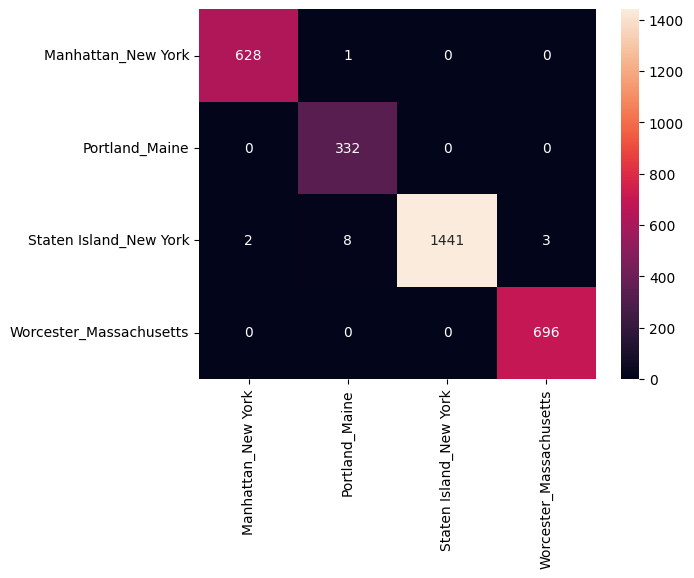

In [28]:
import seaborn as sns
cm= confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=model.classes_,
            yticklabels=model.classes_)